In [399]:
import numpy as np
import pandas as pd
from functools import reduce
import pathlib
import matplotlib.pyplot as plt
import gzip
import scipy.sparse as sparse
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (7.2,4.45)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.markersize'] = 13
plt.style.use('seaborn-white')

In [ ]:
path_model = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Datasets/CORDIS/models_preproc/iter_0")
topic_state_model = path_model.joinpath('modelFiles/topic-state.gz')

In [ ]:
with gzip.open(topic_state_model) as fin:
    topic_state_df = pd.read_csv(fin, delim_whitespace=True,
                                 names=['docid', 'NA1', 'NA2',
                                        'NA3', 'word', 'tpc'],
                                 header=None, skiprows=3)

topic_state_df.word.replace('nan', np.nan, inplace=True)
topic_state_df.fillna('nan_value', inplace=True)

topic_state_df_tpc = topic_state_df[topic_state_df['tpc'] == 2]
topic_to_corpus = topic_state_df_tpc.groupby(
    'docid')['word'].apply(list).reset_index(name='new')

<BarContainer object of 5 artists>

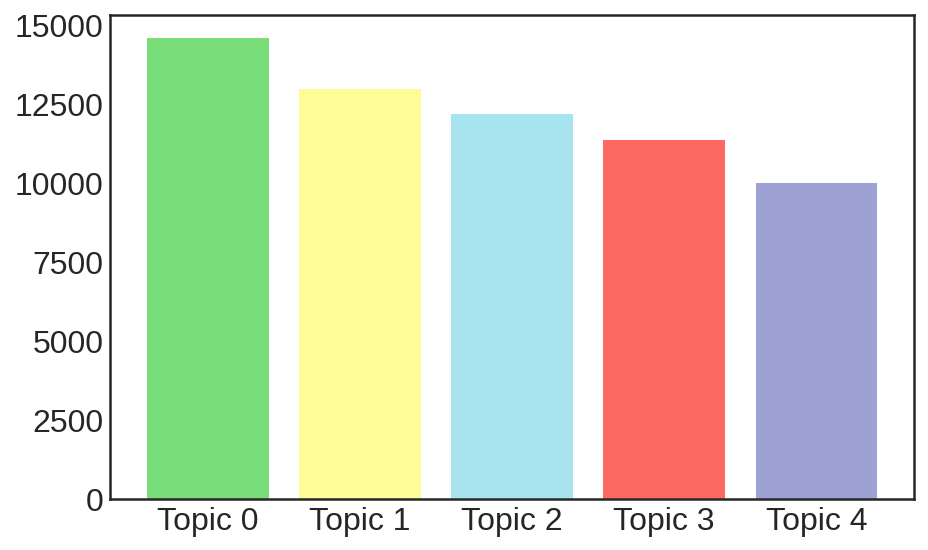

In [376]:
thetas = sparse.load_npz(
                path_model.joinpath('TMmodel/thetas.npz')).todense()
top_prop = np.sum(thetas,axis=0).tolist()[0]
aux = ["Topic 0","Topic 1","Topic 2","Topic 3","Topic 4"]
plt.bar(aux,top_prop, color = ['#79DE79', '#FCFC99', '#A8E4EF', '#FB6962','#9EA1D4'])

In [377]:
topic_to_corpus.iloc[0:20]

,docid,new
0,0,"[modern, guinea, country, december, individual..."
1,1,[identify]
2,3,"[evolution, unprecedented, anthropogenic_forci..."
3,4,"[mediterranean_region, strategic, improve, pro..."
4,7,"[personal, advisor, large_scale, past, informa..."
5,8,"[audio_visual, analyse, judgement, comparative..."
6,9,"[determinant, security, determinant, quantify]"
7,11,"[tangible, national, country, field, protectio..."
8,13,"[environment, rate, major, repercussion, long_..."
9,14,"[join, ecophysiological, ecosystem, land, atmo..."


In [397]:
topic_state_df[topic_state_df.docid==4]

,docid,NA1,NA2,NA3,word,tpc
381,4,nan_value,0,277,sustainability,0
382,4,nan_value,1,278,water,0
383,4,nan_value,2,279,secure,0
384,4,nan_value,3,280,food,0
385,4,nan_value,4,281,production,0
...,...,...,...,...,...,...
495,4,nan_value,114,345,agriculture,0
496,4,nan_value,115,346,meet,0
497,4,nan_value,116,120,future,2
498,4,nan_value,117,347,constraint_impose,0


In [382]:
thetas_2 = thetas[:,2]
np.argwhere(thetas_2 < 0.6)
#np.argwhere(thetas_2 > 0.6)[0:20]

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [11,  0],
       [12,  0],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0],
       [17,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0]])

<BarContainer object of 5 artists>

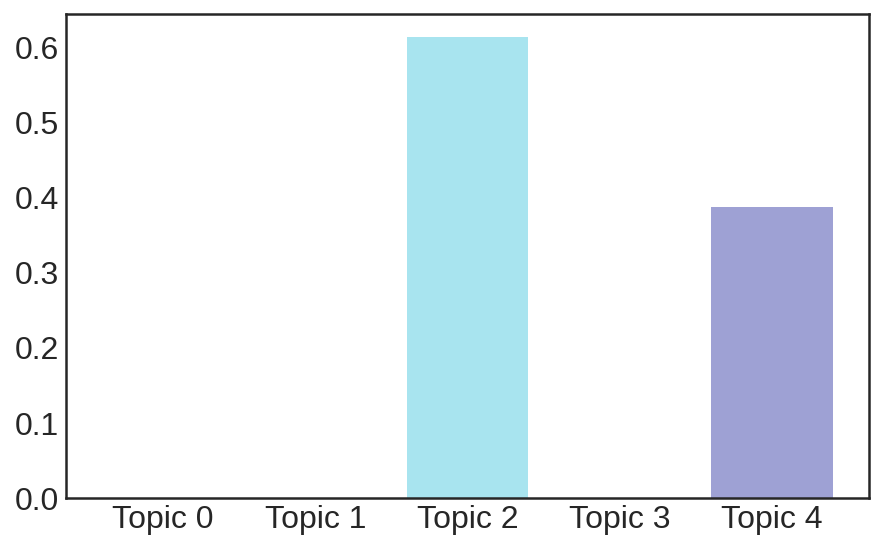

In [381]:
doc_id_1 = 4

aux = ["Topic 0","Topic 1","Topic 2","Topic 3","Topic 4"]
plt.bar(aux,thetas[4].tolist()[0], color = ['#79DE79', '#FCFC99', '#A8E4EF', '#FB6962','#9EA1D4'])

<BarContainer object of 5 artists>

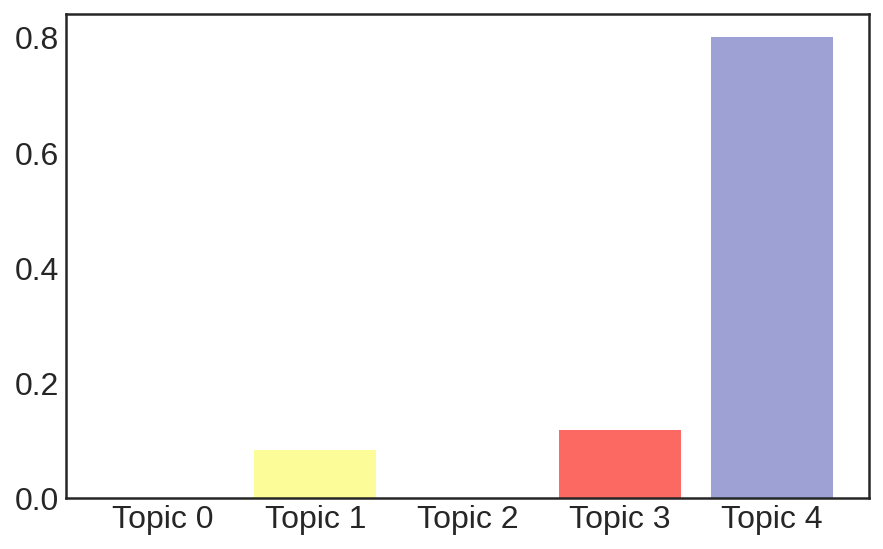

In [385]:
doc_id_1 = 3

aux = ["Topic 0","Topic 1","Topic 2","Topic 3","Topic 4"]
plt.bar(aux,thetas[3].tolist()[0], color = ['#79DE79', '#FCFC99', '#A8E4EF', '#FB6962','#9EA1D4'])